# Vorlesungsnotebook Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

## Naive Bayes

[[ 0.92141506 -9.98499137]
 [-5.26927614 -9.6186543 ]
 [-0.45292089 -6.04316334]
 [-0.0856312  -2.16867404]
 [ 1.53194956 -0.36022153]]
[0 0 0 1 1]


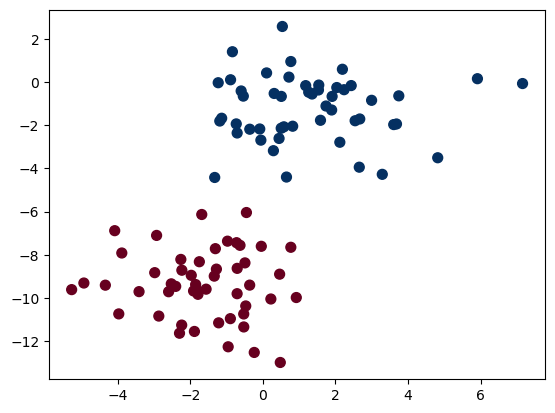

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

print(X[0:5,:])
print(y[0:5])

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
print("Means")
print(model.theta_)

Means
[[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]


In [5]:
print("Variance")
print(model.var_)

Variance
[[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


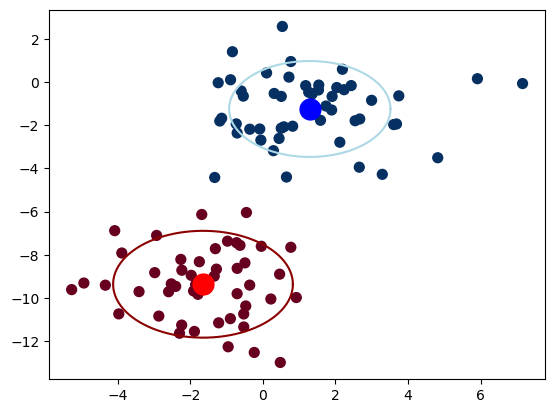

In [6]:
from sklearn.datasets import make_blobs
from matplotlib.patches import Ellipse

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
plt.plot(model.theta_[0,0],model.theta_[0,1],'ro',markersize=15)
plt.plot(model.theta_[1,0],model.theta_[1,1],'bo',markersize=15)


u=model.theta_[0,0]     
v=model.theta_[0,1]    
a=model.var_[0,1]   
b=model.var_[0,1]    

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t),c='darkred' )

u=model.theta_[1,0]    
v=model.theta_[1,1]    
a=model.var_[1,1]     
b=model.var_[1,1]   

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) ,c='lightblue')

In [7]:
feat=np.array([-4,-10]).reshape(1,-1)


print(model.predict_log_proba(feat))
print(model.predict_proba(feat))


print(model.predict(feat))

[[-1.65677871e-09 -2.02183906e+01]]
[[9.99999998e-01 1.65677887e-09]]
[0]


## Andere Verteilung: Polynomialverteilung

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

Beispiel: Textklassifikation

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [11]:
print(train.target[5])

print(train.target_names[train.target[5]])

3
talk.religion.misc


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [13]:
model.fit(train.data, train.target)
y = model.predict(test.data)

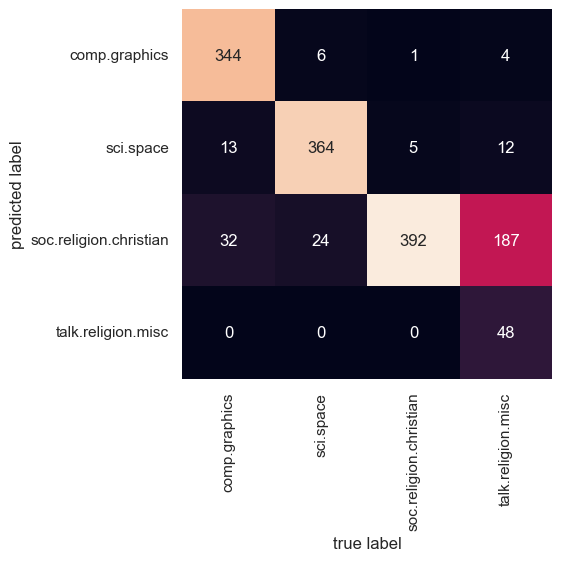

In [14]:
import seaborn as sns; sns.set()


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [16]:
predict_category('sending a payload to the ISS')

'sci.space'

In [17]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [18]:
predict_category('determining the screen resolution')

'comp.graphics'

## Machine Learning Exercise Bayes

### Gaussian Classifier Manual Computation

The following continuous 2D feature vectors were computed from images showing apples
and oranges.

Class „Apples“: (-2, 0), (-1, 1), (-1, -1), (0, 0)

Class „Oranges“: (0, 0), (1, 1), (1, -1), (2, 0)

First question (a): Using this sample set, we would like to train a Gaussian classifier. Compute all relevant parameters for both classes.

Second question (b): Classify the feature vector (1, 1) using the results from (a). What is the classifiers decision?

Third question (c): Compute the Mahalanobis distance to the class centers of the feature vector (1, 1)
using results from (b). What is the decision in this case?

Fourth question (d): Now use a naïve Bayes classifier. What changes compared to (a)?

In [7]:
fruits = np.array([[-2, 0], [-1, 1], [-1, -1], [0, 0],
                   [0, 0], [1, 1], [1, -1], [2, 0]])

fruit_labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])

def calculate_mean_covariance(data):
  mean = np.mean(data, axis=0)
  cov = np.cov(data.T)
  return mean, cov

def calculate_gaussian_probability(x, mean, cov):
  return np.exp(-0.5 * np.dot((x - mean).T, np.dot(cov, (x - mean))))

In [8]:
# (a) First question
apple_mean, apple_cov = calculate_mean_covariance(fruits[fruit_labels == 0])
orange_mean, orange_cov = calculate_mean_covariance(fruits[fruit_labels == 1])

print("Apple Mean:", apple_mean)
print("Apple Covariance Matrix:", apple_cov)
print("Orange Mean:", orange_mean)
print("Orange Covariance Matrix:", orange_cov)

Apple Mean: [-1.  0.]
Apple Covariance Matrix: [[0.66666667 0.        ]
 [0.         0.66666667]]
Orange Mean: [1. 0.]
Orange Covariance Matrix: [[0.66666667 0.        ]
 [0.         0.66666667]]


In [9]:
# (b) Second question
test_vector = np.array([1, 1])

apple_prob = calculate_gaussian_probability(test_vector, apple_mean, apple_cov)
orange_prob = calculate_gaussian_probability(test_vector, orange_mean, orange_cov)

classification = "Orange" if orange_prob > apple_prob else "Apple"
print(f"Gaussian Classifier Prediction: {classification}")

def calculate_gaussian_probability(x, mean, cov):
  return np.exp(-0.5 * np.dot((x - mean).T, np.dot(cov, (x - mean))))

Gaussian Classifier Prediction: Orange


In [10]:
# (c) Third question
apple_distance = euclidean_distances(test_vector.reshape(1, -1), apple_mean.reshape(1, -1), squared=False)[0][0]
orange_distance = euclidean_distances(test_vector.reshape(1, -1), orange_mean.reshape(1, -1), squared=False)[0][0]

classification_distance = "Orange" if orange_distance < apple_distance else "Apple"
print(f"Mahalanobis Distance Prediction: {classification_distance}")

Mahalanobis Distance Prediction: Orange


In [11]:
# (d) Fourth question
class_probs = np.array([0.5, 0.5])


apple_x_prob = 0.25  
apple_y_prob = 0.25  
orange_x_prob = 0.75  
orange_y_prob = 0.75  

apple_posterior = class_probs[0] * apple_x_prob * apple_y_prob
orange_posterior = class_probs[1] * orange_x_prob * orange_y_prob

classification_naive_bayes = "Orange" if orange_posterior > apple_posterior else "Apple"
print(f"Naive Bayes Prediction (Simplified): {classification_naive_bayes}")

Naive Bayes Prediction (Simplified): Orange
